# Retail Analysis with Walmart Data

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set the working directory
import io
%cd "F:\Akshay\Simplilearn\Electives\PYTHON_DATA_SCIENCE\PROJECTS\Retail Analysis with Walmart Data"

F:\Akshay\Simplilearn\Electives\PYTHON_DATA_SCIENCE\PROJECTS\Retail Analysis with Walmart Data


In [3]:
# import the data
walmart_data = pd.read_csv('Walmart_Store_sales.csv')

In [4]:
walmart_data.shape # to see rows and columns present in the data

(6435, 8)

In [5]:
walmart_data.head() # get first five records of the data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
walmart_data.dtypes # check the types of variable in the data

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
# Convert date to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])
walmart_data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [8]:
# check for na values
walmart_data.isnull().sum().sort_values(ascending=False)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
# Splitting the Date into Day Month and Year
walmart_data['Day'] = pd.DatetimeIndex(walmart_data['Date']).day
walmart_data['Month'] = pd.DatetimeIndex(walmart_data['Date']).month
walmart_data['Year'] = pd.DatetimeIndex(walmart_data['Date']).year
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


# Analysis Tasks
# Basic Statistics tasks

# 1. Which store has maximum sales

In [10]:
# we will group the data by store and get the sum of weekly sales
max_sales = walmart_data.groupby('Store')['Weekly_Sales'].sum()
max_sales

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

In [11]:
max_sales.idxmax() # to see which value is maximum

20

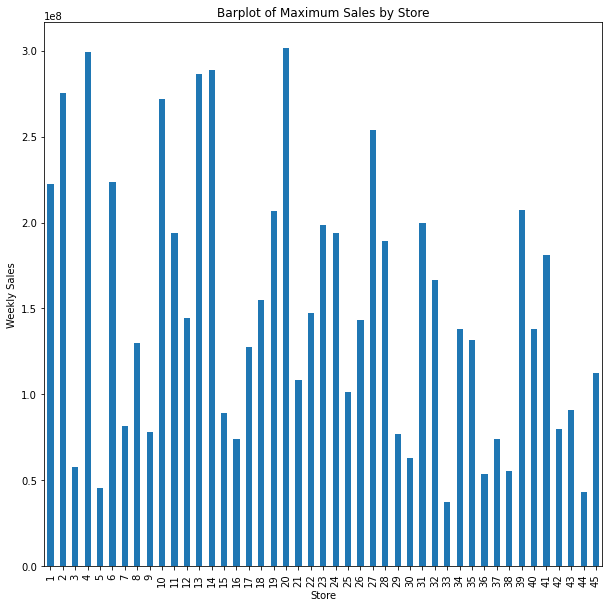

In [12]:
# Lets create a barplot of Maximum Sales by Store
plt.figure(figsize=(10,10))
max_sales.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Maximum Sales by Store')
plt.show()

# So Store number 20 has the maximum sales of 301397800.0

# 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [13]:
# we will group the data by store and get the std deviation of weekly sales
std_dev = walmart_data.groupby('Store')['Weekly_Sales'].std()
std_dev

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64

In [14]:
std_dev.idxmax() # to see which value is maximum

14

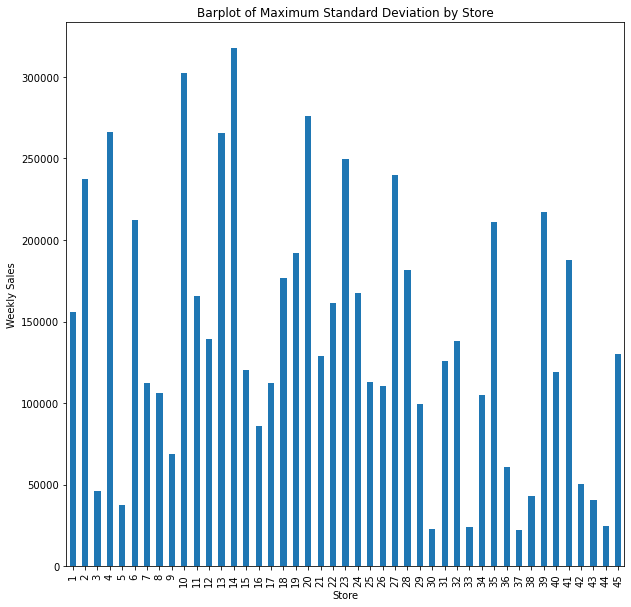

In [15]:
# Lets create a barplot of Maximum Standard Deviation by Store
plt.figure(figsize=(10,10))
std_dev.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Maximum Standard Deviation by Store')
plt.show()

# So Store number 14 has maximum Standard Deviation of 317569.949476

In [16]:
# coefficient of mean to standard deviation = stddev() / mean()
coef_mean_stddev = walmart_data.groupby('Store')['Weekly_Sales'].std() / walmart_data.groupby('Store')['Weekly_Sales'].mean()
coef_mean_stddev

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

In [17]:
coef_mean_stddev.idxmax() # to see which value is maximum

35

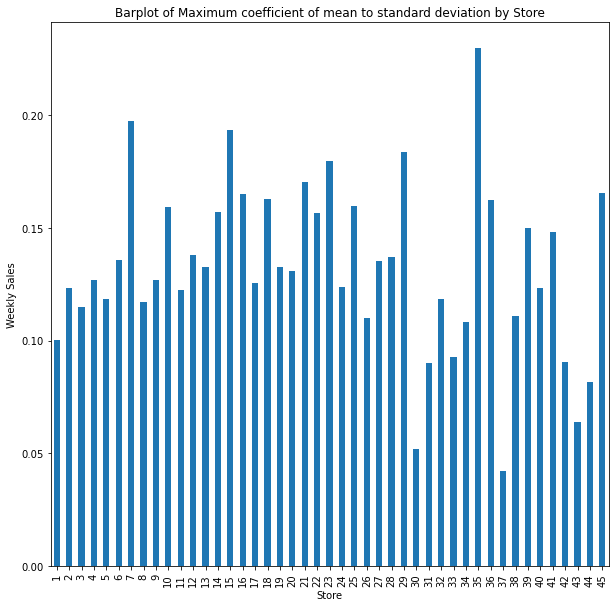

In [18]:
# Lets create a Barplot of Maximum coefficient of mean to standard deviation by Store
plt.figure(figsize=(10,10))
coef_mean_stddev.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Maximum coefficient of mean to standard deviation by Store')
plt.show()

# So Store number 35 has the maximum coefficient of mean to standard deviation of 0.229681

# 3. Which store/s has good quarterly growth rate in Q3’2012

In [19]:
# Quarter 3 starts on July 1 and end on September 30 of a year
Quarter3 = walmart_data[(walmart_data.Date>='2012-07-01') & (walmart_data.Date<='2012-09-30')]
Quarter3.shape

(540, 11)

In [20]:
Quarter3.head() # to get first five records

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348,3,9,2012
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,6,8,2012
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,13,7,2012
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,20,7,2012
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,27,7,2012


In [21]:
# we will group the data by store and get the sum of weekly sales
Q3_max = Quarter3.groupby('Store')['Weekly_Sales'].sum()
Q3_max

Store
1     18633209.98
2     22396867.61
3      4966495.93
4     25652119.35
5      3880621.88
6     18341221.11
7      7322393.92
8     10873860.34
9      6528239.56
10    21169356.45
11    16094363.07
12    11777508.50
13    24319994.35
14    20140430.40
15     6909374.37
16     6441311.11
17    11533998.38
18    12507521.72
19    16644341.31
20    24665938.11
21     8403507.99
22    11818544.33
23    17103654.36
24    16125999.86
25     8309440.44
26    12417575.35
27    20191238.11
28    15055659.67
29     6127862.07
30     5181974.44
31    16454328.46
32    14142164.84
33     3177072.43
34    11476258.98
35    10252122.68
36     3578123.58
37     6250524.08
38     5129297.64
39    18899955.17
40    11647661.37
41    16373588.44
42     6830839.86
43     7376726.03
44     4020486.01
45     8851242.32
Name: Weekly_Sales, dtype: float64

In [22]:
Q3_max.idxmax() # to see which value is maximum

4

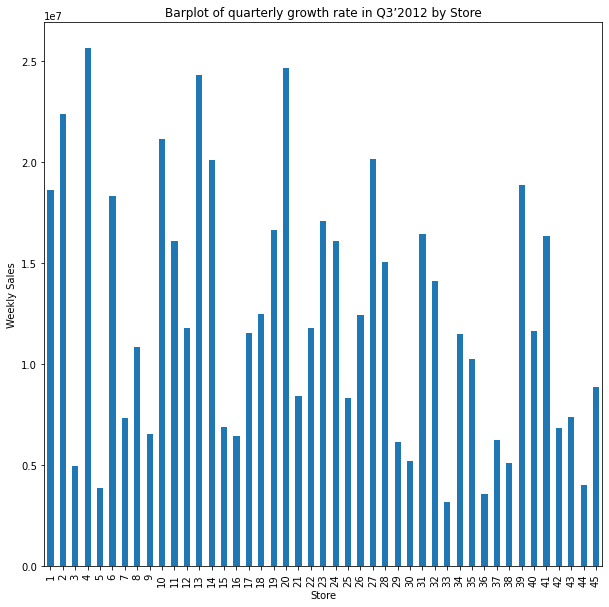

In [23]:
# Lets create Barplot of quarterly growth rate in Q3’2012 by Store 
plt.figure(figsize=(10,10))
Q3_max.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of quarterly growth rate in Q3’2012 by Store')
plt.show()

# So Store number 4 has highest quarterly growth in Q3'2012 of 25652119.35

# 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [24]:
# Holiday Events
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [25]:
# creating separate data of holiday events
Super_Bowl_df = walmart_data.loc[walmart_data.Date.isin(Super_Bowl)]
Labour_Day_df = walmart_data.loc[walmart_data.Date.isin(Labour_Day)]
Thanksgiving_df = walmart_data.loc[walmart_data.Date.isin(Thanksgiving)]
Christmas_df = walmart_data.loc[walmart_data.Date.isin(Christmas)]

In [26]:
# to get the shape of each holiday events data
print(Super_Bowl_df.shape)
print(Labour_Day_df.shape)
print(Thanksgiving_df.shape)
print(Christmas_df.shape)

(135, 11)
(135, 11)
(90, 11)
(90, 11)


In [27]:
# creating a copy of walmart data for the analysis
Total_Sales = walmart_data
Total_Sales.shape # to see rows and columns present in the data

(6435, 11)

In [28]:
# Removing the data containing Super_Bowl holiday
Total_Sales = Total_Sales[Total_Sales.Date!='12-2-2010']
Total_Sales = Total_Sales[Total_Sales.Date!='11-2-2011']
Total_Sales = Total_Sales[Total_Sales.Date!='10-2-2012']

In [29]:
# Removing the data containing Labour_Day holiday
Total_Sales = Total_Sales[Total_Sales.Date!='10-9-2010']
Total_Sales = Total_Sales[Total_Sales.Date!='9-9-2011']
Total_Sales = Total_Sales[Total_Sales.Date!='7-9-2012']

In [30]:
# Removing the data containing Thanksgiving holiday
Total_Sales = Total_Sales[Total_Sales.Date!='26-11-2010']
Total_Sales = Total_Sales[Total_Sales.Date!='25-11-2011']
Total_Sales = Total_Sales[Total_Sales.Date!='23-11-2012']

In [31]:
# Removing the data containing Christmas holiday
Total_Sales = Total_Sales[Total_Sales.Date!='31-12-2010']
Total_Sales = Total_Sales[Total_Sales.Date!='30-12-2011']
Total_Sales = Total_Sales[Total_Sales.Date!='28-12-2012']

In [32]:
Total_Sales.shape # to see rows and columns present in the data

(5985, 11)

In [33]:
# Lets calculate the mean sales in non-holiday season for all stores together
Total_Sales_non_holiday = Total_Sales.Weekly_Sales.mean()
Total_Sales_non_holiday

1041256.3802088564

In [34]:
# Lets calculate mean and total sales for Super Bowl
Super_Bowl_sum = Super_Bowl_df.Weekly_Sales.sum()
print(Super_Bowl_sum)
Super_Bowl_mean = Super_Bowl_df.Weekly_Sales.mean()
print(Super_Bowl_mean)

145682278.34
1079127.9877037033


In [35]:
# Lets calculate mean and total sales for Labour Day
Labour_Day_sum = Labour_Day_df.Weekly_Sales.sum()
print(Labour_Day_sum)
Labour_Day_mean = Labour_Day_df.Weekly_Sales.mean()
print(Labour_Day_mean)

140727684.68
1042427.2939259257


In [36]:
# Lets calculate mean and total sales for Thanksgiving Day
Thanksgiving_sum = Thanksgiving_df.Weekly_Sales.sum()
print(Thanksgiving_sum)
Thanksgiving_mean = Thanksgiving_df.Weekly_Sales.mean()
print(Thanksgiving_mean)

132414608.5
1471273.427777778


In [37]:
# Lets calculate Christmas Day total Sales
Christmas_sum = Christmas_df.Weekly_Sales.sum()
print(Christmas_sum)
Christmas_mean = Christmas_df.Weekly_Sales.mean()
print(Christmas_mean)

86474980.03999999
960833.1115555551


# Lets compare the total and mean sales during holiday season and mean sales during non-holiday season

In [38]:
print(Super_Bowl_sum>Total_Sales_non_holiday)
print(Labour_Day_sum>Total_Sales_non_holiday)
print(Thanksgiving_sum>Total_Sales_non_holiday)
print(Christmas_sum>Total_Sales_non_holiday)
print(Super_Bowl_mean>Total_Sales_non_holiday)
print(Labour_Day_mean>Total_Sales_non_holiday)
print(Thanksgiving_mean>Total_Sales_non_holiday)
print(Christmas_mean>Total_Sales_non_holiday)

True
True
True
True
True
True
True
False


# So from above analysis we can see that the sales are higher for Super Bowl, Labour Day, Thanksgiving Day but it decreases during Christmas Day

# 5 Provide a monthly and semester view of sales in units and give insights

# Monthly view of sales according to year 2010, 2011, 2012

In [39]:
# monthly sales of year 2010
monthly_2010 = walmart_data[walmart_data.Year==2010].groupby('Month')['Weekly_Sales'].sum()
monthly_2010

Month
1     4.223988e+07
2     1.915869e+08
3     1.862262e+08
4     1.838118e+08
5     2.806119e+08
6     1.424361e+08
7     1.842664e+08
8     1.845381e+08
9     1.797041e+08
10    2.311201e+08
11    1.587731e+08
12    3.235716e+08
Name: Weekly_Sales, dtype: float64

In [40]:
print(monthly_2010.idxmax()) # to see which value is maximum
print(monthly_2010.idxmin()) # to see which value is minimum

12
1


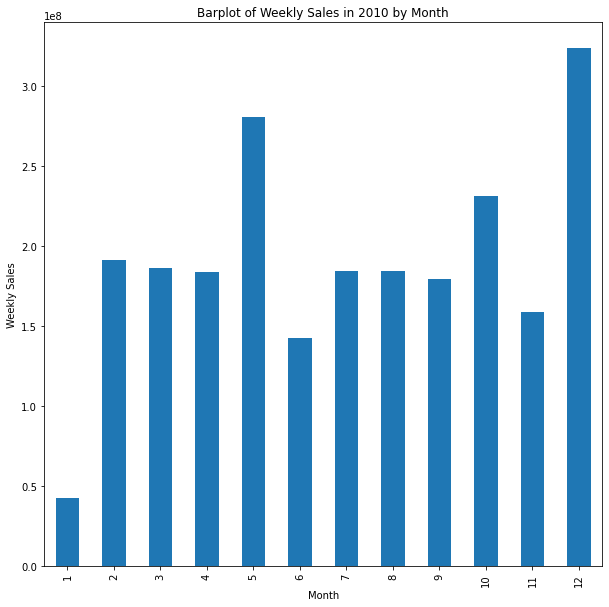

In [41]:
# Lets create Barplot of Weekly Sales in 2010 by Month
plt.figure(figsize=(10,10))
monthly_2010.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Weekly Sales in 2010 by Month')
plt.show()

# From above analysis we see that the maximum weekly sales are in December month of 2010 with sales = 323571600.0 and mimimum weekly sales are in January month on 2010 with sales = 42239880.0

In [42]:
# monthly sales of year 2011
monthly_2011 = walmart_data[walmart_data.Year==2011].groupby('Month')['Weekly_Sales'].sum()
monthly_2011

Month
1     2.119657e+08
2     1.876092e+08
3     1.365205e+08
4     2.789693e+08
5     1.828017e+08
6     1.401936e+08
7     2.244611e+08
8     1.880810e+08
9     2.310323e+08
10    1.837193e+08
11    2.534703e+08
12    2.293760e+08
Name: Weekly_Sales, dtype: float64

In [43]:
print(monthly_2011.idxmax()) # to see which value is maximum
print(monthly_2011.idxmin()) # to see which value is minimum

4
3


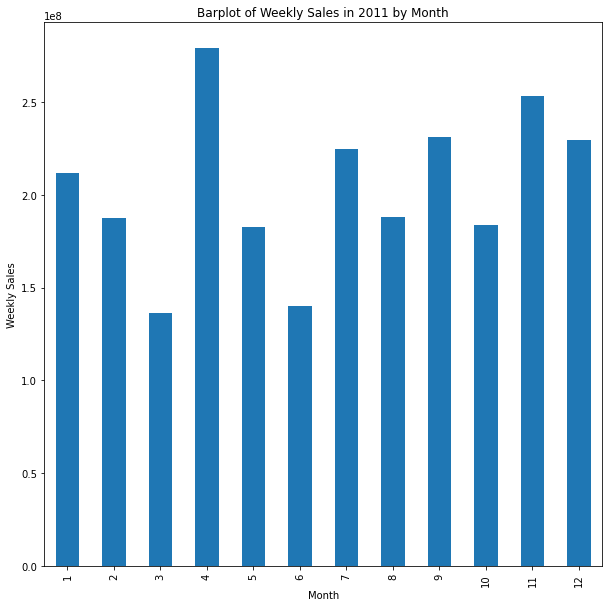

In [44]:
# Lets create Barplot of Weekly Sales in 2011 by Month 
plt.figure(figsize=(10,10))
monthly_2011.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Weekly Sales in 2011 by Month')
plt.show()

# From above analysis we see that the maximum weekly sales are in April month of 2011 with sales = 278969300.0 and minimum weekly sales are in March month of 2011 with sales = 136520500.0

In [45]:
# monthly sales of year 2012
monthly_2012 = walmart_data[walmart_data.Year==2012].groupby('Month')['Weekly_Sales'].sum()
monthly_2012

Month
1     1.722207e+08
2     1.428296e+08
3     2.307397e+08
4     1.825428e+08
5     1.422830e+08
6     2.923883e+08
7     1.845865e+08
8     1.916126e+08
9     1.797959e+08
10    1.880794e+08
11    4.692588e+07
12    4.612851e+07
Name: Weekly_Sales, dtype: float64

In [46]:
print(monthly_2012.idxmax()) # to see which value is maximum
print(monthly_2012.idxmin()) # to see which value is minimum

6
12


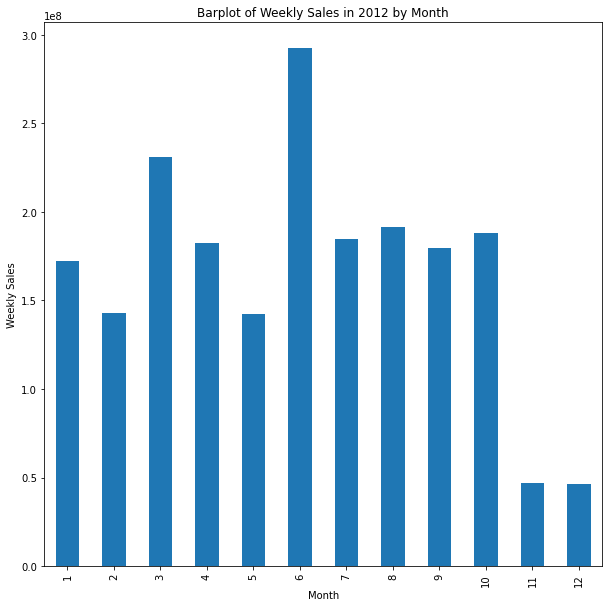

In [47]:
# Lets create a Barplot of Weekly Sales in 2012 by Month
plt.figure(figsize=(10,10))
monthly_2012.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Weekly Sales in 2012 by Month')
plt.show()

# From above analysis we see that the maximum weekly sales are in June month of 2012 with sales = 292388300.0 and minimum weekly sales are in December month of 2012 with sales = 46128510.0

# Semester view of sales according to year 2010, 2011, 2012

In [48]:
# Creating a separate data for year 2010
semester_2010 = walmart_data[walmart_data.Year==2010]

# Lets create 1st semester

semester_2010_1 = semester_2010[(semester_2010['Month']==1)|(semester_2010['Month']==2)
                               |(semester_2010['Month']==3)|(semester_2010['Month']==4)
                               |(semester_2010['Month']==5)|(semester_2010['Month']==6)]

# Lets create 2nd semester

semester_2010_2 = semester_2010[(semester_2010['Month']==7)|(semester_2010['Month']==8)
                               |(semester_2010['Month']==9)|(semester_2010['Month']==10)
                               |(semester_2010['Month']==11)|(semester_2010['Month']==12)]

In [49]:
# Grouping the data of semester 1 by store and total weekly sum
semester_2010_1_df = semester_2010_1.groupby('Store')['Weekly_Sales'].sum()
semester_2010_1_df

Store
1     33033122.34
2     42841056.12
3      8525706.22
4     42192339.87
5      6701544.40
6     35038565.05
7     10815109.56
8     19267863.01
9     11344007.31
10    42114139.70
11    29366659.98
12    21881590.98
13    42335504.96
14    48369011.45
15    14137736.39
16    10585095.48
17    18384441.90
18    25353625.63
19    32603951.71
20    45587134.62
21    16443372.18
22    22683525.07
23    30114081.80
24    29807171.18
25    15805395.32
26    21574270.44
27    40147939.46
28    30262163.02
29    11919251.13
30    10039188.67
31    29359152.31
32    24386054.80
33     5983371.63
34    20514537.03
35    24451750.74
36     9822181.04
37    11278043.78
38     7697803.57
39    28840651.36
40    20874790.31
41    25095924.19
42    11403188.13
43    14345885.77
44     6207927.12
45    17376905.61
Name: Weekly_Sales, dtype: float64

In [50]:
print(semester_2010_1_df.idxmax()) # to see which value is maximum
print(semester_2010_1_df.idxmin()) # to see which value is minimum

14
33


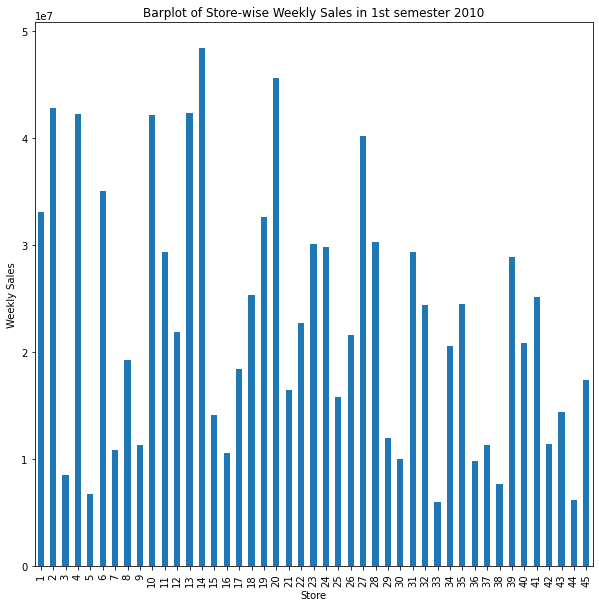

In [51]:
# Lets create Barplot of Store-wise Weekly Sales in 1st semester 2010
plt.figure(figsize=(10,10))
semester_2010_1_df.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Store-wise Weekly Sales in 1st semester 2010')
plt.show()

In [52]:
# Grouping the data of semester 2 by store and total weekly sum
semester_2010_2_df = semester_2010_2.groupby('Store')['Weekly_Sales'].sum()
semester_2010_2_df

Store
1     40245709.66
2     52436808.07
3     10219712.78
4     53488130.94
5      8134486.37
6     41873755.64
7     14752968.59
8     23936611.83
9     13785212.45
10    52358062.51
11    35888478.25
12    26488792.88
13    52937230.49
14    57093230.93
15    17885791.92
16    14143537.11
17    22720478.54
18    30624791.67
19    39976576.93
20    56145946.10
21    21187736.09
22    28181755.34
23    37595023.51
24    37083477.06
25    19330872.42
26    26816427.34
27    49865237.11
28    34516601.91
29    15027576.36
30    11699897.96
31    36201120.45
32    30804881.88
33     6783462.63
34    25635879.76
35    27744220.19
36    11330944.65
37    13230426.08
38     8889990.95
39    36941624.96
40    25482569.21
41    32642296.46
42    14094901.78
43    17191120.22
44     7399592.33
45    21159437.76
Name: Weekly_Sales, dtype: float64

In [53]:
print(semester_2010_2_df.idxmax()) # to see which value is maximum
print(semester_2010_2_df.idxmin()) # to see which value is minimum

14
33


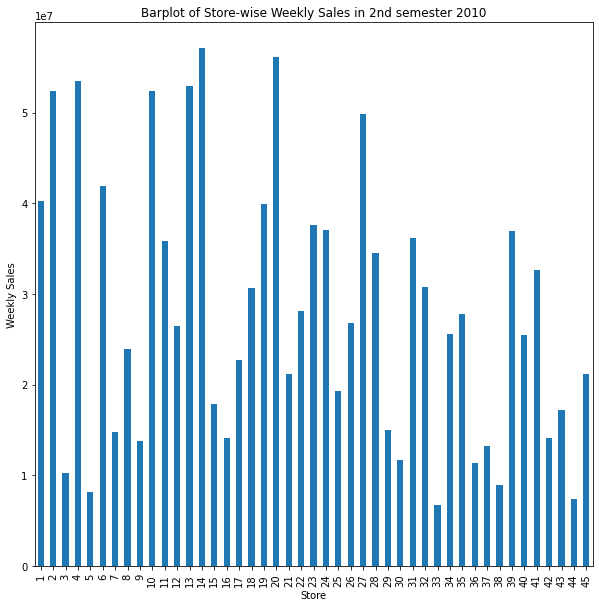

In [54]:
# Lets create Barplot of Store-wise Weekly Sales in 2nd semester 2010
plt.figure(figsize=(10,10))
semester_2010_2_df.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Store-wise Weekly Sales in 2nd semester 2010')
plt.show()

# From above analysis Store 14 has maximum sales during semester 1 and semester 2 of the year 2010 with sales = (48369011.45, 57093230.93) respectively and Store 33 has minimum sales during semester 1 and semester 2 of the year 2010 with sales = (5983371.63, 6783462.63) respectively

In [55]:
# Creating a separate data for year 2011
semester_2011 = walmart_data[walmart_data.Year==2011]

# Lets create 1st semester

semester_2011_1 = semester_2011[(semester_2011['Month']==1)|(semester_2011['Month']==2)
                               |(semester_2011['Month']==3)|(semester_2011['Month']==4)
                               |(semester_2011['Month']==5)|(semester_2011['Month']==6)]

# Lets create 2nd semester

semester_2011_2 = semester_2011[(semester_2011['Month']==7)|(semester_2011['Month']==8)
                               |(semester_2011['Month']==9)|(semester_2011['Month']==10)
                               |(semester_2011['Month']==11)|(semester_2011['Month']==12)]

In [56]:
# Grouping the data of semester 1 by store and total weekly sum
semester_2011_1_df = semester_2011_1.groupby('Store')['Weekly_Sales'].sum()
semester_2011_1_df

Store
1     38293559.24
2     46280995.81
3      9878911.38
4     51238878.47
5      7827646.62
6     37742670.32
7     13463532.94
8     22431887.62
9     13418673.03
10    46002645.67
11    32979834.61
12    24731108.76
13    48029057.39
14    49411760.50
15    14949612.31
16    12129220.81
17    21286937.26
18    24952941.87
19    34659164.14
20    51247747.99
21    18807514.20
22    24644950.56
23    32803512.34
24    32033886.14
25    16722760.92
26    23604694.55
27    42635454.02
28    33223540.20
29    12973855.77
30    10799324.52
31    34864733.57
32    28290375.83
33     6101241.06
34    23707690.84
35    20053730.30
36     9481723.56
37    13113144.49
38     9444065.65
39    34504516.81
40    23249716.56
41    30486880.45
42    13667552.37
43    15459506.86
44     7331454.37
45    19097393.74
Name: Weekly_Sales, dtype: float64

In [57]:
print(semester_2011_1_df.idxmax()) # to see which value is maximum
print(semester_2011_1_df.idxmin()) # to see which value is minimum

20
33


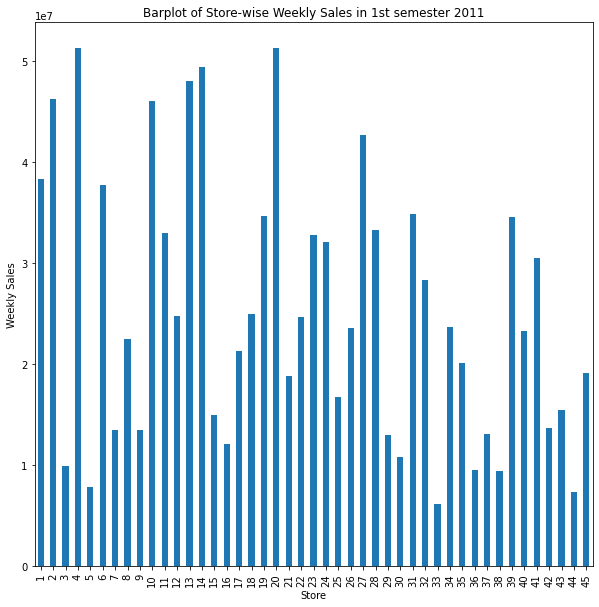

In [58]:
# Lets create Barplot of Store-wise Weekly Sales in 1st semester 2011
plt.figure(figsize=(10,10))
semester_2011_1_df.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Store-wise Weekly Sales in 1st semester 2011')
plt.show()

In [59]:
# Grouping the data of semester 2 by store and total weekly sum
semester_2011_2_df = semester_2011_2.groupby('Store')['Weekly_Sales'].sum()
semester_2011_2_df

Store
1     42628359.59
2     52326885.61
3     10937965.19
4     59853414.86
5      8643173.38
6     42786092.63
7     17199107.58
8     25080898.54
9     15267296.62
10    52914249.07
11    37543748.28
12    27850891.81
13    56508455.94
14    56684510.20
15    17333012.59
16    15292146.68
17    25104902.50
18    29264798.24
19    40182736.04
20    58589254.37
21    21427369.74
22    28909761.37
23    39470021.45
24    37905090.73
25    19711644.80
26    28444557.17
27    49287230.17
28    35932468.38
29    14976489.43
30    11382823.89
31    39304491.95
32    33056817.65
33     6856595.61
34    26652491.22
35    24033248.33
36     9490895.19
37    13968351.28
38    10496692.80
39    41273086.49
40    27090826.37
41    36228993.86
42    15449750.30
43    16593688.59
44     8166740.30
45    22037974.14
Name: Weekly_Sales, dtype: float64

In [60]:
print(semester_2011_2_df.idxmax()) # to see which value is maximum
print(semester_2011_2_df.idxmin()) # to see which value is minimum

4
33


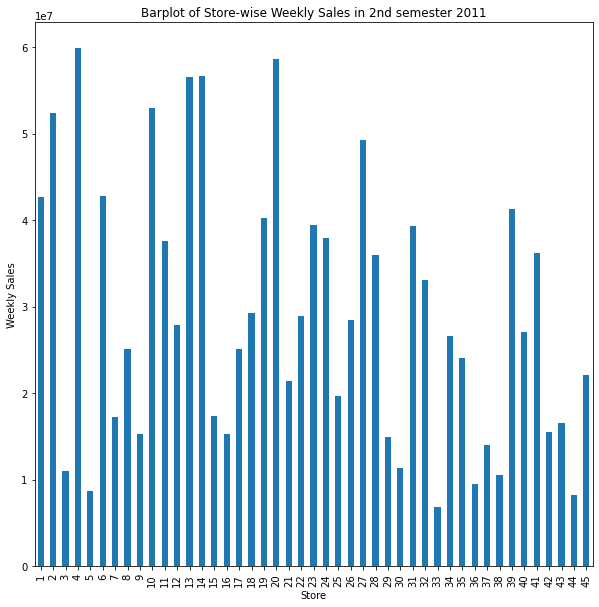

In [61]:
# Lets create Barplot of Store-wise Weekly Sales in 2nd semester 2011
plt.figure(figsize=(10,10))
semester_2011_2_df.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Store-wise Weekly Sales in 2nd semester 2011')
plt.show()

# From above analysis Store 20 has maximum sales in 1st semester and Store 4 has maximum sales in the 2nd semester of the year 2011 with sales = (51247747.99, 59853414.86) respectively and Store 33 has minimum sales during semester 1 and semester 2 of the year 2011 with sales = (6101241.06, 6856595.61) respectively

In [62]:
# Creating a separate data for year 2012
semester_2012 = walmart_data[walmart_data.Year==2012]

# Lets create 1st semester

semester_2012_1 = semester_2012[(semester_2012['Month']==1)|(semester_2012['Month']==2)
                               |(semester_2012['Month']==3)|(semester_2012['Month']==4)
                               |(semester_2012['Month']==5)|(semester_2012['Month']==6)]

# Lets create 2nd semester

semester_2012_2 = semester_2012[(semester_2012['Month']==7)|(semester_2012['Month']==8)
                               |(semester_2012['Month']==9)|(semester_2012['Month']==10)
                               |(semester_2012['Month']==11)|(semester_2012['Month']==12)]

In [63]:
# Grouping the data of semester 1 by store and total weekly sum
semester_2012_1_df = semester_2012_1.groupby('Store')['Weekly_Sales'].sum()
semester_2012_1_df

Store
1     39988063.27
2     47629070.24
3     10520103.97
4     54043493.01
5      8340091.82
6     38920058.40
7     14829946.03
8     22768291.61
9     14054562.38
10    45974809.47
11    34081526.41
12    25460760.75
13    50144112.76
14    46653392.59
15    14454018.54
16    12608669.10
17    23257339.74
18    25971400.40
19    34220784.38
20    52192485.09
21    17757893.93
22    24754491.93
23    33424118.61
24    32825590.54
25    16999927.56
26    24315000.55
27    41698865.82
28    32603470.86
29    12956726.29
30    10983805.87
31    35002903.11
32    28999055.37
33     6582406.07
34    24391980.49
35    19877002.86
36     7883052.89
37    13197743.24
38    10881966.20
39    37788653.51
40    23727366.43
41    32365291.09
42    14555833.58
43    15821698.97
44     8143903.88
45    19352334.72
Name: Weekly_Sales, dtype: float64

In [64]:
print(semester_2012_1_df.idxmax()) # to see which value is maximum
print(semester_2012_1_df.idxmin()) # to see which value is minimum

4
33


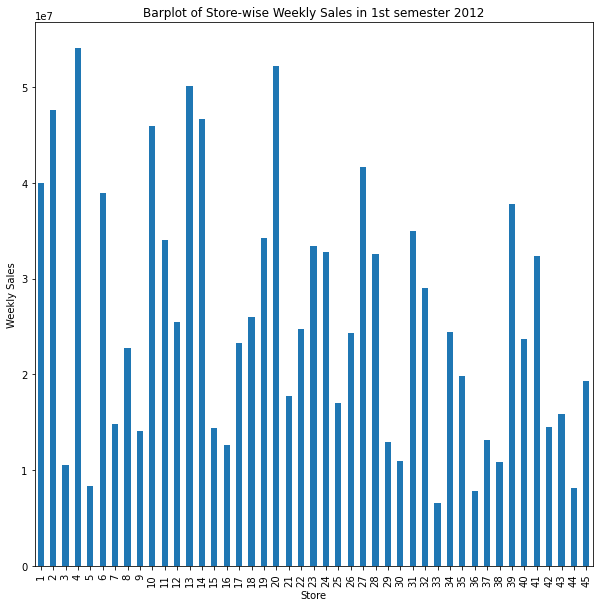

In [65]:
# Lets create Barplot of Store-wise Weekly Sales in 1st semester 2012
plt.figure(figsize=(10,10))
semester_2012_1_df.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Store-wise Weekly Sales in 1st semester 2012')
plt.show()

In [66]:
# Grouping the data of semester 2 by store and total weekly sum
semester_2012_2_df = semester_2012_2.groupby('Store')['Weekly_Sales'].sum()
semester_2012_2_df

Store
1     28213994.75
2     33867625.13
3      7504335.53
4     38727696.23
5      5828746.31
6     27394988.60
7     10537610.44
8     16465628.52
9      9919467.20
10    32253807.47
11    24102539.27
12    17874084.97
13    36563342.26
14    30788005.67
15    10373512.17
16     9493756.22
17    17028038.89
18    18947176.40
19    24991648.90
20    37635224.29
21    12493992.78
22    17901164.30
23    25343860.14
24    24360805.63
25    12490578.15
26    18661443.74
27    30221190.30
28    22725436.21
29     9287655.33
30     7811844.21
31    24881504.11
32    21282060.63
33     4853144.96
34    17347183.66
35    15360719.66
36     5403417.64
37     9415031.45
38     7749107.25
39    28097009.34
40    17445040.91
41    24522548.84
42    10394526.27
43    11153535.00
44     6043469.84
45    13371295.45
Name: Weekly_Sales, dtype: float64

In [67]:
print(semester_2012_2_df.idxmax()) # to see which value is maximum
print(semester_2012_2_df.idxmin()) # to see which value is minimum

4
33


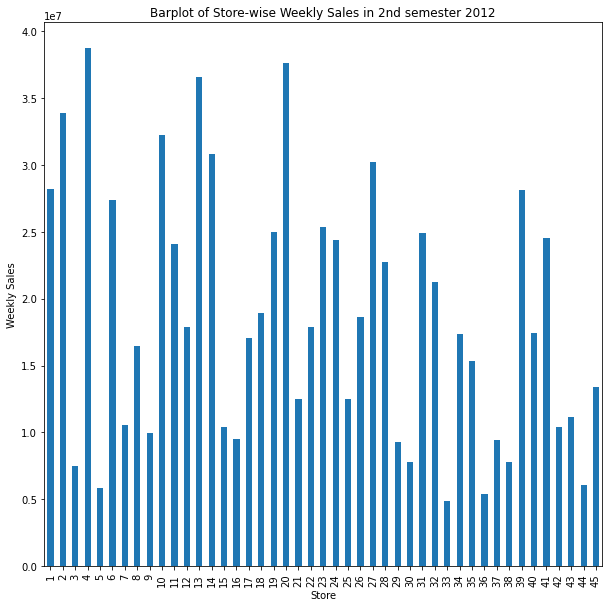

In [68]:
# Lets create Barplot of Store-wise Weekly Sales in 2nd semester 2012
plt.figure(figsize=(10,10))
semester_2012_2_df.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Barplot of Store-wise Weekly Sales in 2nd semester 2012')
plt.show()

# From above analysis Store 4 has maximum sales during semester 1 and semester 2 of the year 2012 with sales = (54043493.01, 38727696.23) respectively and Store 33 has minimum sales during semester 1 and semester 2 of the year 2012 with sales = (6582406.07, 4853144.96) respectively

# Statistical Model

# For Store 1 – Build  prediction models to forecast demand

# 1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [69]:
walmart_data.head() # to get first five records

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [70]:
# creating a separte variable for Date
date = walmart_data.Date

In [71]:
# creating a function to restructure the date
def number_function(data):

    encountered_data = {}
    result = []

    idx = 1
    for a in data:
        if a in encountered_data:  # check if you already seen this data
            result.append(encountered_data[a])
        else:
            encountered_data[a] = idx
            result.append(idx)
            idx += 1
    return result

In [72]:
# applying function to date
DATE = number_function(date)

In [73]:
# print the output
print(DATE)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

In [74]:
# converting into pandas dataframe to merge with walmart data
DATE = pd.DataFrame(DATE)

In [75]:
# merging DATE to walmart data
walmart_data_df = pd.concat([walmart_data,DATE],axis=1)
walmart_data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,0
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,5


In [76]:
# renaming the column 0 to DATE
walmart_data_df.columns = ['DATE' if x==0 else x for x in walmart_data_df.columns]

In [77]:
walmart_data_df.head() # to get first five records

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,DATE
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,5


# So we restructured the date as per the problem statement

# For Store 1 – Build prediction models to forecast demand

In [78]:
# creating a new data for Store 1
walmart_data_Store1 = walmart_data_df[walmart_data.Store==1]
# we will drop column Date as we already restructed it
walmart_data_Store1 = walmart_data_Store1.drop('Date',axis=1)
walmart_data_Store1.shape

(143, 11)

In [79]:
walmart_data_Store1.head() # to get first five records

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,DATE
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,3
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,5


In [80]:
walmart_data_Store1.dtypes # to check type of variables in the data 

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Day               int64
Month             int64
Year              int64
DATE              int64
dtype: object

In [81]:
# Creating a Dependent and Independent variables 
y = walmart_data_Store1.Weekly_Sales
X = walmart_data_Store1.drop('Weekly_Sales',axis=1)

In [82]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=111)

In [83]:
# Check the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 10)
(29, 10)
(114,)
(29,)


In [84]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [85]:
LRmodel = LR.fit(X_train,y_train)

In [86]:
LRmodel.score(X_train,y_train)

0.3196902801084288

In [87]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [88]:
DTmodel = DT.fit(X_train,y_train)

In [89]:
DTmodel.score(X_train,y_train)

1.0

In [90]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=2000)

In [91]:
RFmodel = RF.fit(X_train,y_train)

In [92]:
RFmodel.score(X_train,y_train)

0.9056733609765377

In [93]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=2000)

In [94]:
GBRmodel = GBR.fit(X_train,y_train)

In [95]:
GBRmodel.score(X_train,y_train)

0.9999999999999996

# So from above analysis we found that Random Forest is the best model with a score of 90.56%

In [96]:
# predicted values for Store 1 
RFpredict = RFmodel.predict(X_test)
print(RFpredict)

[1542417.54200502 1405266.11342499 1439339.42863498 1611634.52541499
 1577788.49832497 1485203.466335   1666050.38716002 1520361.28539503
 1653561.29865999 1530147.89916499 1567260.29938498 1587595.06625502
 1624832.92929999 2009252.58384995 1685907.55000503 1666297.19462503
 1527752.75742001 1511247.32502498 1652638.77249997 1515648.92061998
 1460643.98556499 1474460.228045   1513291.56645499 1573837.967995
 1447421.924435   1613773.36685503 1413214.46146499 1517788.74871502
 1516488.33070002]


In [97]:
# compare actual values with predicted 
predicted = pd.DataFrame({'Actual':y_test,'Predicted':RFpredict})
predicted.Predicted = pd.to_numeric(predicted.Predicted,downcast='float')
predicted

,Actual,Predicted
39,1551659.28,1542417.500
24,1385065.20,1405266.125
15,1399662.07,1439339.375
57,1553191.63,1611634.500
87,1630989.95,1577788.500
36,1459409.10,1485203.500
105,1802477.43,1666050.375
26,1605491.78,1520361.250
65,1629391.28,1653561.250
67,1428218.27,1530147.875


# Now we will Build prediction models on whole data

In [98]:
walmart_data_df.head() # to get first five records

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,DATE
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,5


In [99]:
walmart_data_df.shape # to see rows and columns

(6435, 12)

In [100]:
# Drop the Date variable as it is restructured
walmart_data_final = walmart_data_df.drop(['Date'],axis=1)
walmart_data_final.shape

(6435, 11)

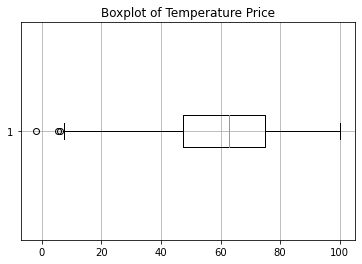

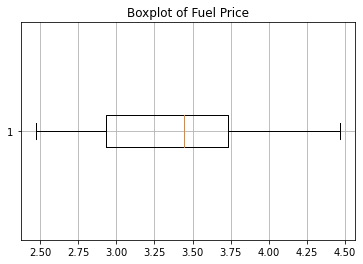

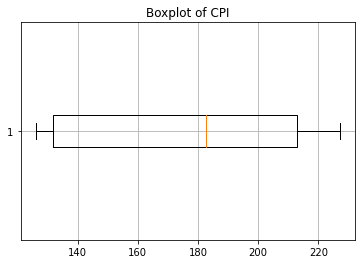

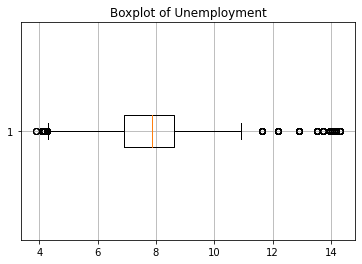

In [101]:
# Check for outliers

# Temperature
plt.boxplot(walmart_data_final.Temperature,vert=False)
plt.title('Boxplot of Temperature Price')
plt.grid(True)
plt.show()

# Fuel Price
plt.boxplot(walmart_data_final.Fuel_Price,vert=False)
plt.title('Boxplot of Fuel Price')
plt.grid(True)
plt.show()

# CPI
plt.boxplot(walmart_data_final.CPI,vert=False)
plt.title('Boxplot of CPI')
plt.grid(True)
plt.show()

# Unemployment
plt.boxplot(walmart_data_final.Unemployment,vert=False)
plt.title('Boxplot of Unemployment')
plt.grid(True)
plt.show()

# There are some outliers in Unemployment and Temperature column so we will delete outliers as it affects the model performance

In [102]:
# Removing Outlier
walmart_data_final = walmart_data_final[(walmart_data_final.Unemployment<10)&(walmart_data_final.Unemployment>4.5)
                                    &(walmart_data_final.Temperature>10)]

In [103]:
walmart_data_final.shape

(5658, 11)

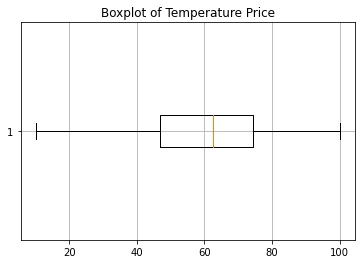

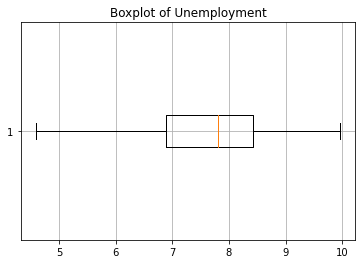

In [104]:
# Check if outliers are removed
# Temperature
plt.boxplot(walmart_data_final.Temperature,vert=False)
plt.title('Boxplot of Temperature Price')
plt.grid(True)
plt.show()

# Unemployment
plt.boxplot(walmart_data_final.Unemployment,vert=False)
plt.title('Boxplot of Unemployment')
plt.grid(True)
plt.show()

# Now we can see that the outliers are removed

In [105]:
# Creating a Dependent and Independent variables 
y1 = walmart_data_final.Weekly_Sales
X1 = walmart_data_final.drop(['Weekly_Sales'],axis=1)

In [106]:
# split the data into train and test
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.20,random_state=111)

In [107]:
# Check shape of train and test data
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(4526, 10)
(1132, 10)
(4526,)
(1132,)


In [108]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LRmodel1 = LR.fit(X1_train,y1_train)

In [109]:
LRmodel1.score(X1_train,y1_train)

0.1392828266511137

In [110]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DTmodel1 = DT.fit(X1_train,y1_train)

In [111]:
DTmodel1.score(X1_train,y1_train)

1.0

In [112]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 1000,max_depth=15,n_jobs=5)
RFmodel1 = RF.fit(X1_train,y1_train)

In [113]:
RFmodel1.score(X1_train,y1_train)

0.9902499160064397

In [114]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=1000)
GBRmodel1 = GBR.fit(X1_train,y1_train)

In [115]:
GBRmodel1.score(X1_train,y1_train)

0.9903927533005779

# So from above analysis we found that none of the model is best fit so we will use feature reduction techniques and select specific columns to see if we get a best fit model

# Here we will also use sklearn.metrics to get MAE,MSE,RMSE of the models

In [116]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
# Select Dependent and Independent Variable 
X = walmart_data_final[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = walmart_data_final['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [118]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, reg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, reg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))

Linear Regression:

Accuracy: 13.532117397405907
Mean Absolute Error: 447950.57687547826
Mean Squared Error: 290005188223.1115
Root Mean Squared Error: 538521.2978361315


In [119]:
# Decision Tree model
print('Decision Tree:')
print()
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('Accuracy:',dt.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))

Decision Tree:

Accuracy: 100.0
Mean Absolute Error: 79476.36668727915
Mean Squared Error: 20026881036.07893
Root Mean Squared Error: 141516.3631389633


In [120]:
# Random Forest Model
print('Random Forest Regressor:')
print()
rf = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('Accuracy:',rf.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Random Forest Regressor:

Accuracy: 94.69823793959632
Mean Absolute Error: 70472.67690208786
Mean Squared Error: 17124210128.252043
Root Mean Squared Error: 130859.50530340562


In [121]:
# Gradient Boosting Model
print('Gradient Boosting Regressor:')
print()
gbr = GradientBoostingRegressor(n_estimators = 400)        
gbr.fit(X_train,y_train)
gbr_pred=gbr.predict(X_test)
print('Accuracy:',gbr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gbr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gbr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gbr_pred)))

Gradient Boosting Regressor:

Accuracy: 96.67426006213536
Mean Absolute Error: 65466.73175640061
Mean Squared Error: 10741838067.998434
Root Mean Squared Error: 103642.83896149523


# So from above analysis we found that Random Forest is the best model with a score of 94.69%

In [122]:
# compare actual values with predicted 
predicted1 = pd.DataFrame({'Actual':y_test,'Predicted':rf_pred})
predicted1.Predicted = pd.to_numeric(predicted1.Predicted,downcast='float')
predicted1.head(25)

,Actual,Predicted
2920,732056.37,7.315326e+05
2682,1308977.05,1.419986e+06
4453,1124763.74,1.170106e+06
2161,479430.00,4.466028e+05
3359,1373841.91,1.416658e+06
6230,324174.79,2.917946e+05
4875,1182099.88,1.171478e+06
1206,528420.28,5.433805e+05
4467,1061089.56,1.086240e+06
3844,2062224.92,1.827990e+06


In [123]:
# we will use random forest model to see if CPI, unemployment, and fuel price have any impact on sales
print(list(zip(X_train.columns,rf.fit(X_train,y_train).feature_importances_)))

[('Store', 0.6817835817003797), ('Fuel_Price', 0.011535361160497212), ('CPI', 0.20278973201083741), ('Unemployment', 0.05754106169068641), ('Day', 0.025305946977143133), ('Month', 0.020494628362391718), ('Year', 0.000549688098064405)]


# From above analysis we found that CPI has more impact on sales than unemployment, and fuel price

# Change dates into days by creating new variable.

In [124]:
walmart_data['Days'] = pd.DatetimeIndex(walmart_data['Date']).day_name()

In [125]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,Monday


# Summary :
# 1. Store 20 has the maximum sales of 301397800.0 
# 2. Store 14 has maximum Standard Deviation of 317569.949476
# 3. Store 35 has the maximum coefficient of mean to standard deviation of 0.229681
# 4. Store 4 has highest quarterly growth in Q3'2012 of 25652119.35
# 5. The sales are higher for Super Bowl, Labour Day, Thanksgiving Day but it decreases during Christmas Day
# 6. The maximum weekly sales are in December month of 2010 and mimimum weekly sales are in January month on 2010
# 7. The maximum weekly sales are in April month of 2011 and minimum weekly sales are in March month of 2011
# 8. The maximum weekly sales are in June month of 2012 minimum weekly sales are in December month of 2012
# 9. Store 14 has maximum sales during semester 1 and semester 2 of the year 2010 
# 10. Store 20 has maximum sales in 1st semester and Store 4 has maximum sales in the 2nd semester of the year 2011
# 11. Store 4 has maximum sales during semester 1 and semester 2 of the year 2012
# 12. Store 33 has minimum sales during semester 1 and semester 2 of the year 2010,2011,2012
# 13. We restructured the date as per the problem statement
# 14. Random Forest is the best model for both store 1 and the whole data sales prediction  
# 15. CPI has more impact on sales than unemployment, and fuel price
# 16. Created a new variable that gives day name from the date